In [1]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
stockFile = 'data/T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])
stock.tail(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-18,1.577,1.604,1.556,1.587,0,1.587
2016-07-19,1.553,1.575,1.546,1.558,0,1.558
2016-07-20,1.568,1.596,1.566,1.580,0,1.580
2016-07-21,1.601,1.628,1.563,1.565,0,1.565
2016-07-22,1.585,1.599,1.544,1.570,0,1.570
2016-07-25,1.584,1.584,1.554,1.571,0,1.571
2016-07-26,1.559,1.587,1.549,1.563,0,1.563
2016-07-27,1.570,1.570,1.511,1.515,0,1.515
2016-07-28,1.525,1.535,1.493,1.511,0,1.511


In [3]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']
stock_train.head(15)

Date
2000-01-03    6.54800
2000-01-10    6.53900
2000-01-17    6.66300
2000-01-24    6.73720
2000-01-31    6.67280
2000-02-07    6.56760
2000-02-14    6.61680
2000-02-21    6.53775
2000-02-28    6.37400
2000-03-06    6.39280
2000-03-13    6.36960
2000-03-20    6.23420
2000-03-27    6.13920
2000-04-03    6.07860
2000-04-10    5.85580
Freq: W-MON, Name: Close, dtype: float64

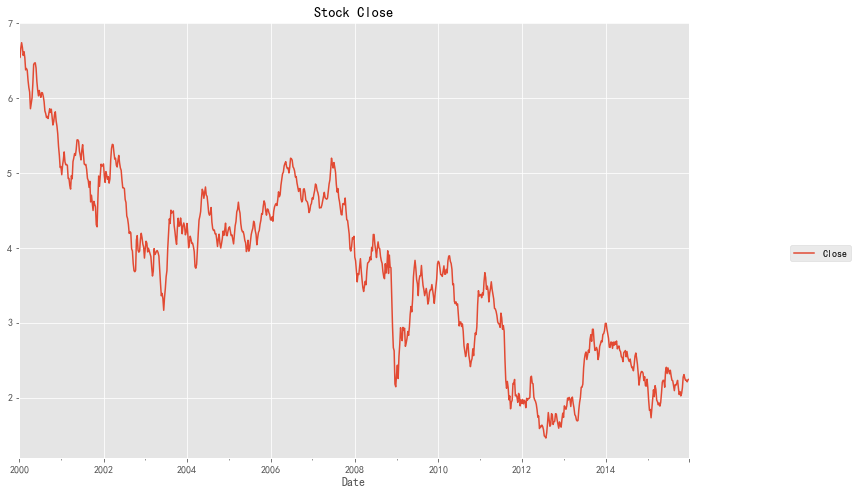

In [4]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

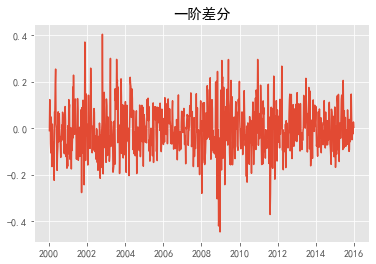

In [5]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

<ipython-input-6-f1f97055dcb5>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()
<ipython-input-6-f1f97055dcb5>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


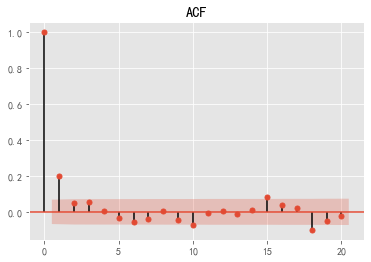

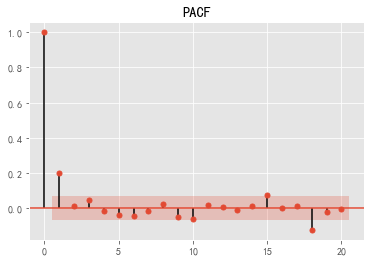

In [6]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [ ]:
#热力图定阶
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4
# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    try:
        model = sm.tsa.SARIMAX(stock_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');

In [ ]:
#信息准则定阶
train_results = sm.tsa.arma_order_select_ic(stock_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

In [7]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')

In [8]:
result = model.fit()
#print(result.summary())

In [9]:
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels')
print (pred)

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
                ...   
2016-06-06    1.923406
2016-06-13    1.918251
2016-06-20    1.913095
2016-06-27    1.907940
2016-07-04    1.902785
Freq: W-MON, Length: 109, dtype: float64


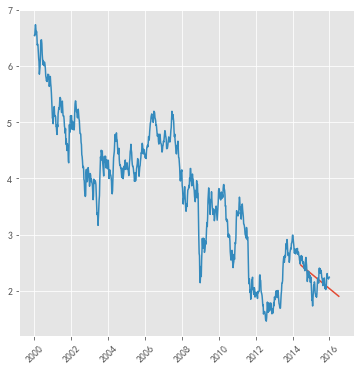

In [10]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)

In [13]:
result.plot_diagnostics(figsize=(16, 12));

AttributeError: 'ARIMAResults' object has no attribute 'plot_diagnostics'